#This analysis seeks to answer the question of what factors- price,time of year, type of chocolate- most influences chocolate sales in the given dataset.

#Conclusion:

#Based on results of the linear regression I conducted, order behavior (the price per box and the number of boxes of each chocolate sold) is the most influential factor in chocolate sales. Salesperson, country or what the product was had little effect.
#However, the visualizations I created demonstrated that the month in which a sale is made and the country it is shipped to also plays a role in sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('chocolate_sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


#The Dataset organizes the data by sales person, the country they made the sale in, product(the name of the chocolate), the date the sale was made(All sales take place in 2022), the total amount of money made by the sale and the total boxes shipped.

In [4]:
df.head(10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,06-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,04-Jul-22,"$2,835",102


In [5]:
#22 different chocolates in dataset
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

#I changed the data type of the amount column to a float and the date column to a datetime object so I could use the info in visualizations.

In [6]:
# Changing the amount column from object to float
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)

In [7]:
# Converting the 'Date' column to datetime objects.

df['Date'] = pd.to_datetime(df['Date'])
print(df.head())


     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


<ipython-input-7-c7184cc4df8d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


#Determing the extent to which specific salespeople influenced sales

#Finding which salespeople made most money

In [8]:
# Grouping by salesperson and sum the profit
sales_profit = df.groupby('Sales Person')['Amount'].sum()

# Sorting the sales by profit in descending order
sales_profit_sorted = sales_profit.sort_values(ascending=False)

sales_profit_sorted

,Amount
Sales Person,
Ches Bonnell,320901.0
Oby Sorrel,316645.0
Madelene Upcott,316099.0
Brien Boise,312816.0
Kelci Walkden,311710.0
Van Tuxwell,303149.0
Dennison Crosswaite,291669.0
Beverie Moffet,278922.0
Kaine Padly,266490.0


#Finding which salespeople sold the most boxes

In [9]:
# Grouping by salesperson and sum the profit
salespeople_boxes_shipped = df.groupby('Sales Person')['Boxes Shipped'].sum()

# Sorting the sales by profit in descending order
salespeople_boxes_shippedsorted= salespeople_boxes_shipped.sort_values(ascending=False)

salespeople_boxes_shippedsorted

,Boxes Shipped
Sales Person,
Karlen McCaffrey,9658
Beverie Moffet,9214
Dennison Crosswaite,8767
Kelci Walkden,8702
Oby Sorrel,8608
Brien Boise,8102
Marney O'Breen,8043
Jan Morforth,7661
Ches Bonnell,7522


#Determining which chocolate each top salesperson sold the most of

In [10]:
# Grouping by salesperson and product, then summing the amount
sales_product_profit = df.groupby(['Sales Person', 'Product'])['Amount'].sum().reset_index()

# Find the top 10 salespeople
top_salespeople = sales_profit_sorted.head(10).index

# Filter the sales data for the top salespeople
top_sales_data = sales_product_profit[sales_product_profit['Sales Person'].isin(top_salespeople)]

# Find the most profitable product for each top salesperson
top_products = top_sales_data.loc[top_sales_data.groupby('Sales Person')['Amount'].idxmax()]

# Display the results
top_products

,Sales Person,Product,Amount
57,Beverie Moffet,Smooth Sliky Salty,33901.0
72,Brien Boise,Milk Bars,29785.0
104,Ches Bonnell,Choco Coated Almonds,42854.0
152,Dennison Crosswaite,Organic Choco Syrup,35721.0
279,Kaine Padly,After Nines,31374.0
324,Kelci Walkden,Drinking Coco,32921.0
338,Madelene Upcott,70% Dark Bites,33390.0
393,Marney O'Breen,Smooth Sliky Salty,31220.0
412,Oby Sorrel,Smooth Sliky Salty,31976.0
470,Van Tuxwell,Organic Choco Syrup,45451.0


#Total amount of chocolates out of 22 that each salesperson sold

In [11]:
# Creating a dictionary to store the unique chocolates sold by each salesperson
unique_chocolates_sold = {}

# Iterate through the top salespeople
for salesperson in top_salespeople:
    # Filter data for the current salesperson
    salesperson_data = df[df['Sales Person'] == salesperson]
    # Find the unique chocolates sold by the salesperson
    unique_chocolates = salesperson_data['Product'].unique()
    # Store the unique chocolates in the dictionary
    unique_chocolates_sold[salesperson] = unique_chocolates

# Create a list to store the results
result = []

# Iterate through the top salespeople in their order of appearance
for salesperson in top_salespeople:
    # Get the number of unique chocolates
    num_unique = len(unique_chocolates_sold[salesperson])
    # Append the salesperson and the count of unique chocolates
    result.append([salesperson, num_unique])

# Convert to DataFrame for better display
result_df = pd.DataFrame(result, columns=['Sales Person', 'Unique Chocolates Sold'])

result_df


,Sales Person,Unique Chocolates Sold
0,Ches Bonnell,20
1,Oby Sorrel,20
2,Madelene Upcott,20
3,Brien Boise,21
4,Kelci Walkden,22
5,Van Tuxwell,21
6,Dennison Crosswaite,21
7,Beverie Moffet,20
8,Kaine Padly,19
9,Marney O'Breen,20


#Determining top salespeople in each region by boxes shipped

In [12]:
country_salesperson_boxes = df.groupby(['Country', 'Sales Person'])['Boxes Shipped'].sum().reset_index()

# Sort by 'Country' and 'Boxes Shipped' (descending) to find top salespeople in each country
country_salesperson_boxes = country_salesperson_boxes.sort_values(['Country', 'Boxes Shipped'], ascending=[True, False])

# Get the top salesperson in each country
top_salespersonboxes_by_country = country_salesperson_boxes.groupby('Country').head(3).reset_index()

# Display the results
print(top_salespersonboxes_by_country)

    index      Country         Sales Person  Boxes Shipped
0       2    Australia       Beverie Moffet           2209
1      16    Australia        Kelci Walkden           2060
2      17    Australia      Madelene Upcott           2010
3      40       Canada     Karlen McCaffrey           2266
4      44       Canada       Marney O'Breen           2181
5      45       Canada           Oby Sorrel           2076
6      65        India     Karlen McCaffrey           2276
7      66        India        Kelci Walkden           2085
8      62        India         Jan Morforth           2030
9      76  New Zealand         Barr Faughny           1668
10     92  New Zealand      Madelene Upcott           1471
11     81  New Zealand       Curtice Advani           1470
12    113           UK       Jehu Rudeforth           2423
13    120           UK           Oby Sorrel           2041
14    112           UK         Jan Morforth           1985
15    132          USA  Dennison Crosswaite           19

#Determing top salespeople in each region by boxes shipped

In [13]:
country_salesperson_sales = df.groupby(['Country', 'Sales Person'])['Amount'].sum().reset_index()

# Sort by 'Country' and 'Amount' (descending) to find top salespeople in each country
country_salesperson_sales = country_salesperson_sales.sort_values(['Country', 'Amount'], ascending=[True, False])

# Get the top salesperson in each country
top_salesperson_by_country = country_salesperson_sales.groupby('Country').head(3).reset_index()

# Display the results
print(top_salesperson_by_country)

    index      Country         Sales Person   Amount
0      18    Australia       Mallorie Waber  71134.0
1       7    Australia  Dennison Crosswaite  65275.0
2       3    Australia          Brien Boise  60417.0
3      27       Canada       Beverie Moffet  71995.0
4      28       Canada          Brien Boise  60375.0
5      41       Canada        Kelci Walkden  57078.0
6      55        India         Ches Bonnell  98763.0
7      73        India          Van Tuxwell  85785.0
8      70        India           Oby Sorrel  75579.0
9      92  New Zealand      Madelene Upcott  67550.0
10     76  New Zealand         Barr Faughny  61145.0
11     94  New Zealand       Marney O'Breen  58212.0
12    117           UK      Madelene Upcott  71330.0
13    113           UK       Jehu Rudeforth  69895.0
14    120           UK           Oby Sorrel  69279.0
15    132          USA  Dennison Crosswaite  69545.0
16    141          USA        Kelci Walkden  69356.0
17    140          USA     Karlen McCaffrey  6

#Does one country sell more chocolates than the others?

['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
       Country  Total_Boxes_Shipped  Total_Sales_Amount
0    Australia                32647           1137367.0
4           UK                30265           1051792.0
2        India                29470           1045800.0
5          USA                26824           1035349.0
1       Canada                31221            962899.0
3  New Zealand                26580            950418.0


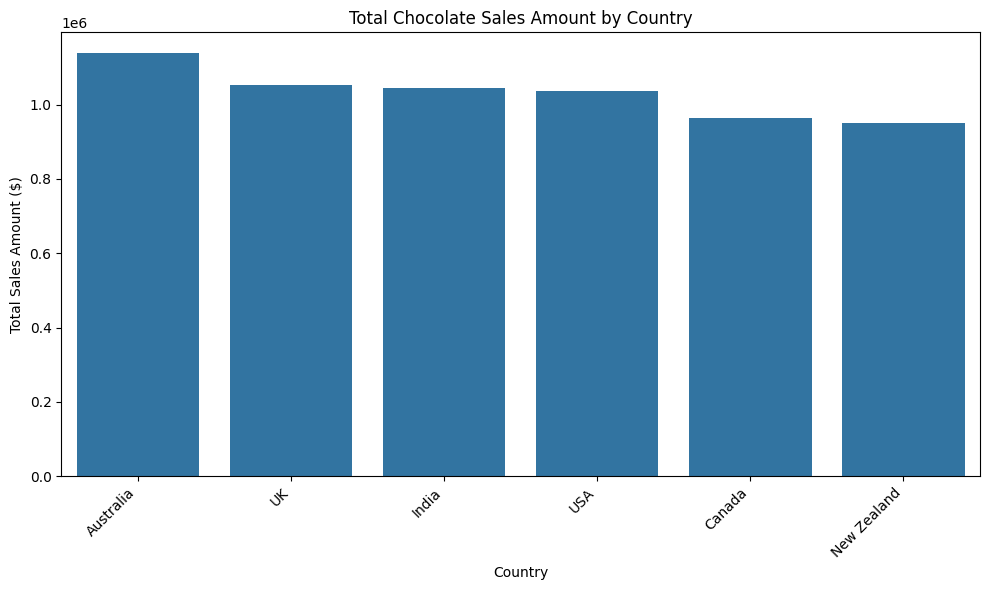

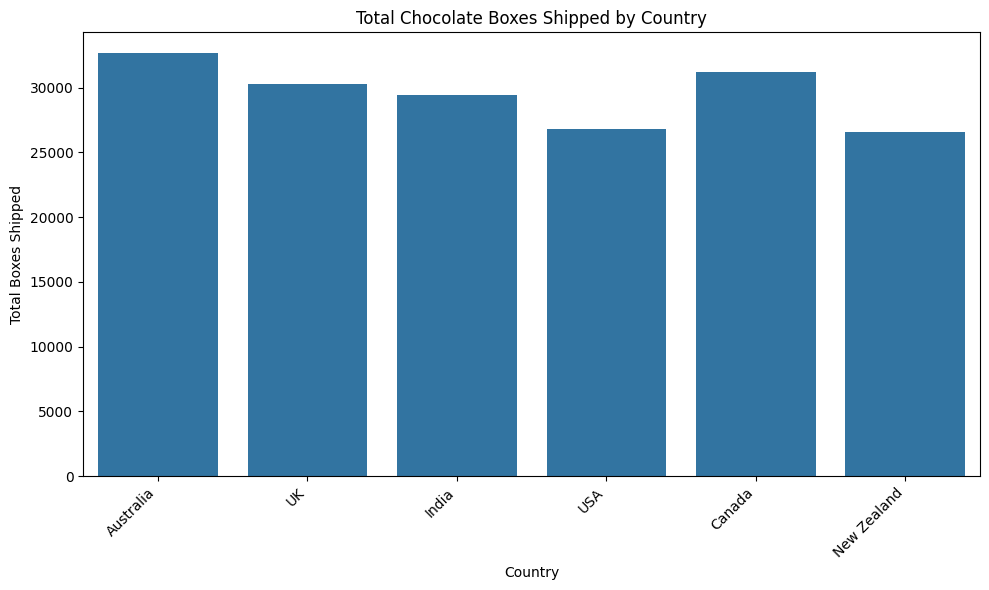

In [14]:
from collections.abc import ValuesView
# Group by 'Country' and calculate total boxes shipped and total sales amount
unique_countries = df['Country'].unique()
print(unique_countries)

country_sales = df.groupby('Country').agg(
    Total_Boxes_Shipped=('Boxes Shipped', 'sum'),
    Total_Sales_Amount=('Amount', 'sum')
).reset_index()

# Sort by Total Sales Amount in descending order
country_sales_sorted = country_sales.sort_values(by=['Total_Sales_Amount'], ascending=False)

# Display the results
print(country_sales_sorted)

# Optional: Create visualizations for better understanding
# Example: Bar plot of Total Sales Amount by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total_Sales_Amount', data=country_sales_sorted)
plt.title('Total Chocolate Sales Amount by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Example: Bar plot of Total Boxes Shipped by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total_Boxes_Shipped', data=country_sales_sorted)
plt.title('Total Chocolate Boxes Shipped by Country')
plt.xlabel('Country')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#While overall sales performance across all regions shows limited variation between salespeople, there is a more noticeable regional influence on individual performance. Since all countries are buying a comparable amount of chocolates, it can be fairy deduced that some salespeople are somewhat more influential in some countries more than others.

#Key Factors:

Regional Variation: Salesperson effectiveness varies within specific regions. Some excel in certain countries, suggesting regional market knowledge or customer relationships play a role.

Overall Performance: When looking at the total sales across all regions, differences between salespeople are less pronounced, possibly due to varying market potentials in assigned territories.

Limited Scope: The analysis primarily focuses on sales amount as a metric and may not encompass other factors like deals closed or customer acquisition rate.



#Determining if price influences chocolate sales


#Finding price per box

In [15]:
# Calculating the price per box
df['Price per box'] = df['Amount'] / df['Boxes Shipped']

# Displaying the updated DataFrame with the 'Price per box' column
print(df[['Product', 'Price per box']])

                  Product  Price per box
0         Mint Chip Choco      29.555556
1           85% Dark Bars      84.000000
2     Peanut Butter Cubes      49.461538
3     Peanut Butter Cubes      37.210526
4     Peanut Butter Cubes      74.375000
...                   ...            ...
1089  Spicy Special Slims      13.653251
1090           White Choc      55.117647
1091  Organic Choco Syrup       2.645161
1092              Eclairs       5.432292
1093       70% Dark Bites      14.752907

[1094 rows x 2 columns]


##Since prices vary depending on the region, the average price per box needs to be calculated

In [16]:
#Since prices vary depending on the region, the average price per box needs to be calculated

# Group by 'Product' and calculate the average 'Price per box'
average_prices = df.groupby('Product')['Price per box'].mean().reset_index()

# Sort the average prices in ascending order
sorted_average_prices = average_prices.sort_values(by=['Price per box'], ascending=True)

# Display the sorted average prices
print(sorted_average_prices)

                 Product  Price per box
1         70% Dark Bites      58.789504
9          Drinking Coco      62.866962
7   Caramel Stuffed Bars      74.604475
5           Almond Choco      74.745097
4            After Nines      74.939872
12    Manuka Honey Choco      79.354147
13             Milk Bars      81.873545
19    Smooth Sliky Salty      88.729109
18       Raspberry Choco      90.046391
6    Baker's Choco Chips      90.840861
16   Organic Choco Syrup      91.183100
17   Peanut Butter Cubes      92.304101
2          85% Dark Bars     103.126839
11      Fruit & Nut Bars     107.149963
0         50% Dark Bites     111.746304
10               Eclairs     117.648077
15          Orange Choco     119.714285
20   Spicy Special Slims     119.888335
8   Choco Coated Almonds     120.400117
3        99% Dark & Pure     146.797884
14       Mint Chip Choco     161.577957
21            White Choc     232.048425


#Finding which chocolate is most profitable

In [17]:
# Group by 'Product' and sum 'Amount' to get total sales revenue
product_revenue = df.groupby('Product')['Amount'].sum().reset_index()

# Sort by total revenue in descending order to find best-selling products
best_selling_by_revenue = product_revenue.sort_values(by=['Amount'], ascending=False)

# Display the best-selling chocolates by revenue
print(best_selling_by_revenue)

                 Product    Amount
19    Smooth Sliky Salty  349692.0
0         50% Dark Bites  341712.0
21            White Choc  329147.0
17   Peanut Butter Cubes  324842.0
10               Eclairs  312445.0
3        99% Dark & Pure  299796.0
2          85% Dark Bars  299229.0
16   Organic Choco Syrup  294700.0
20   Spicy Special Slims  293454.0
14       Mint Chip Choco  283969.0
5           Almond Choco  277536.0
12    Manuka Honey Choco  275541.0
13             Milk Bars  269248.0
18       Raspberry Choco  264740.0
4            After Nines  261331.0
11      Fruit & Nut Bars  259147.0
9          Drinking Coco  256655.0
15          Orange Choco  256144.0
6    Baker's Choco Chips  249613.0
8   Choco Coated Almonds  241486.0
7   Caramel Stuffed Bars  231588.0
1         70% Dark Bites  211610.0


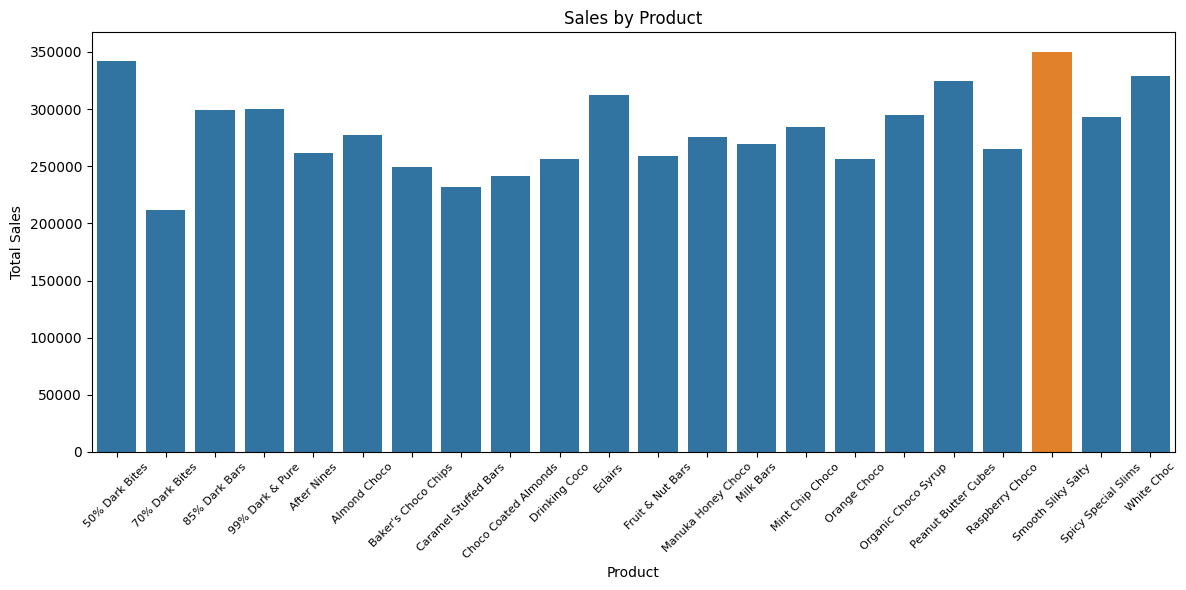

In [18]:
product_sales = df.groupby('Product')['Amount'].sum().reset_index()

best_product = product_sales.loc[product_sales['Amount'].idxmax(), 'Product']

# Create a color column based on best-selling product
product_sales['Color'] = ['red' if product == best_product else 'blue' for product in product_sales['Product']]

plt.figure(figsize=(12, 6))

# Use 'hue' and 'legend' instead of 'palette'
sns.barplot(data=product_sales, x='Product', y='Amount', hue='Color', dodge=False, legend=False)

plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Sales by Product")
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

#Scatter plot demonstrating relationship between price and sales

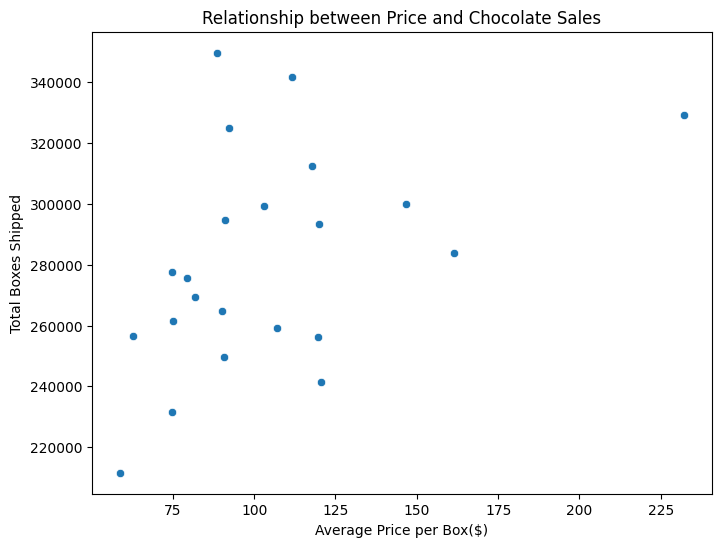

In [19]:
# Merge the two DataFrames to have average price and total sales in one DataFrame
sales_with_price = pd.merge(average_prices, product_sales, on='Product')

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='Price per box', y='Amount', data=sales_with_price)
plt.title('Relationship between Price and Chocolate Sales')
plt.xlabel('Average Price per Box($)')
plt.ylabel('Total Boxes Shipped')
plt.show()

#The cheapest chocolates are not represented among the ones that generated the most revenue...so price is not a key factor influencing sales.

#Based on the scatter plot, it can further be concluded that there is a weak/no correlation between the average price per box of chocolates and the total boxes shipped. The points in the scatter plot appear to be randomly scattered without a clear upward or downward trend. Based on this, we can conclude that chocolates with higher prices don't necessarily sell significantly less, and chocolates with lower prices don't necessarily sell significantly more.

#Determing whether time of year affects sales

<ipython-input-20-303e3770e8df>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()


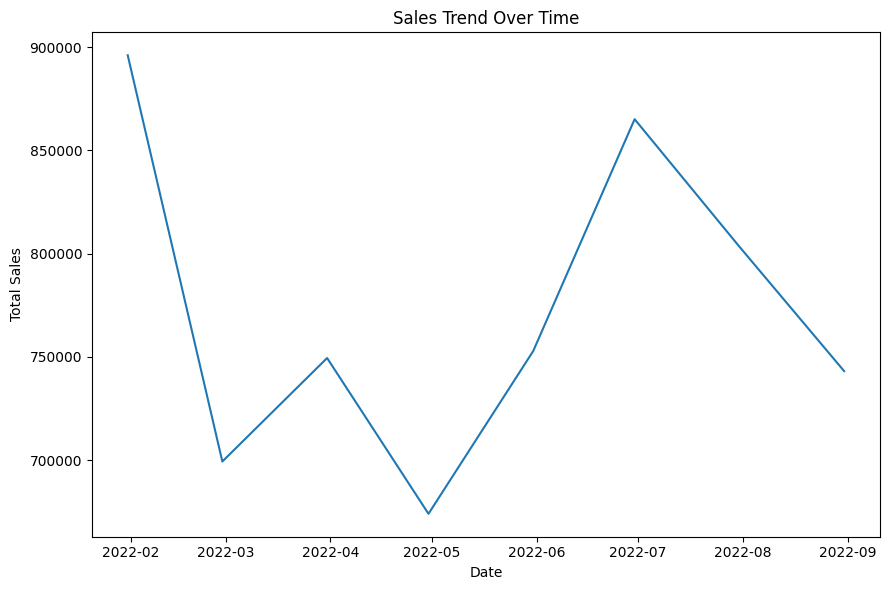

In [20]:
 # Group the data by month and sum the sales amounts
sales_time = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(9, 6))
sns.lineplot(data=sales_time, x='Date', y='Amount' )
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.tight_layout()
plt.show()

#The month has a very big influence on chocolate sales. There is a drastic difference in sales in February as compared to May. Since the dataset only includes info from one year and seasons vary depending on the country, seasonality can't be considered.

#Finding out which days sales were highest to see if holidays played a role

          Date    Amount
124 2022-06-30  134036.0
7   2022-01-13   94822.0
63  2022-04-05   93807.0
129 2022-07-07   91413.0
29  2022-02-16   89320.0
113 2022-06-15   82320.0
146 2022-08-01   81655.0
70  2022-04-15   80857.0
89  2022-05-12   80619.0
1   2022-01-04   77175.0


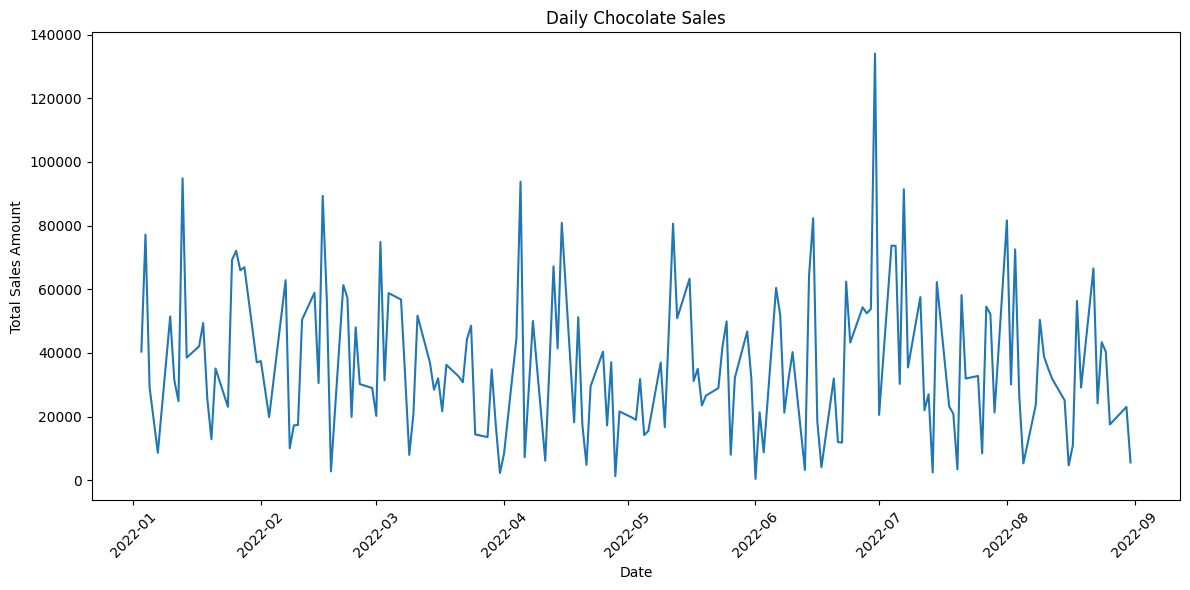

In [21]:
# Group by 'Date' and sum 'Amount' to get daily sales
daily_sales = df.groupby('Date')['Amount'].sum().reset_index()

# Sort daily sales in descending order
daily_sales_sorted = daily_sales.sort_values(by=['Amount'], ascending=False)

# Display the top days with highest sales
print(daily_sales_sorted.head(10))  # Adjust the number to show more or fewer top days

# Optional: Visualize daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'])
plt.title('Daily Chocolate Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Based on common holidays in 2022
#We can't conclude from the dataset if specific holidays are influencing candy sales as the weeks leading up to certain major holidays like Halloween and Christmas, in which candy sales tend to peak, are missing from the dataset.


2022-06-30: No major holidays in the US or many other countries.

2022-01-13: No major holidays.

2022-04-05: No major holidays, its proximity to Easter (April 17th in 2022) might have some influence on sales, as people prepare for the holiday.

2022-07-07: No major holidays.

2022-02-16: No major holidays, but 2 days after Valentine's Day so increased sales could be due to that

2022-06-15: No major holidays.

2022-08-01: No major holidays.

2022-04-15: Good Friday (Christian holiday) in 2022. This date falls on a significant Christian holiday, which could potentially influence sales patterns.

2022-05-12: No major holidays.

2022-01-04: No major holidays, but being shortly after New Year's Day, there might be residual effects from holiday celebrations that could influence sales.


#Linear Regression

#Converting the datetime objects to months so that the linear regression model can learn the cyclical patterns within a year, instead of treating each date as a unique value.

In [22]:
df['Month'] = pd.to_datetime(df['Date'], format='%d-%b-%y').dt.month
df.drop(columns=['Date'], inplace=True)
df.head()


,Sales Person,Country,Product,Amount,Boxes Shipped,Price per box,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,29.555556,1
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,84.000000,8
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,49.461538,7
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,37.210526,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,74.375000,2


#Converting Categorical Columns to Numerical values so that the machine learning model can understand them

In [23]:
df = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True, dtype=int)
df.head()

,Amount,Boxes Shipped,Price per box,Month,Sales Person_Barr Faughny,Sales Person_Beverie Moffet,Sales Person_Brien Boise,Sales Person_Camilla Castle,Sales Person_Ches Bonnell,Sales Person_Curtice Advani,...,Product_Manuka Honey Choco,Product_Milk Bars,Product_Mint Chip Choco,Product_Orange Choco,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc
0,5320.0,180,29.555556,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,7896.0,94,84.000000,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4501.0,91,49.461538,7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12726.0,342,37.210526,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13685.0,184,74.375000,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
stdSc = StandardScaler()

df['Amount'] = stdSc.fit_transform(df[['Amount']].astype(float))
df.head()

,Amount,Boxes Shipped,Price per box,Month,Sales Person_Barr Faughny,Sales Person_Beverie Moffet,Sales Person_Brien Boise,Sales Person_Camilla Castle,Sales Person_Ches Bonnell,Sales Person_Curtice Advani,...,Product_Manuka Honey Choco,Product_Milk Bars,Product_Mint Chip Choco,Product_Orange Choco,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc
0,-0.081040,180,29.555556,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.547166,94,84.000000,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.280768,91,49.461538,7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.725052,342,37.210526,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.958922,184,74.375000,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#Preparing the data and creating the model for the linear regression

In [25]:
import statsmodels.api as sm
#Creating a new data frame called X by taking the original dataframe and removing the "Boxes Shipped" column
#X will represent our independent variables(factors that might influence sales)
X = df.drop(columns=['Boxes Shipped'])

#Creating a series called y that contains only the "Boxes Shipped" data. This is the dependent variable.
#Boxes shipped was chosen as the dependent variable because it provides a more direct measure of sales volume independent of price. Using 'Amount" isn't ideal
#because there are price variations across products and regions.

y = df['Boxes Shipped']

#Adds a constant term(intercept) to our independent variables.
X = sm.add_constant(X)

#creates an Ordinary Least Squares regression model object. It is a common type of linear regression. The .fit() calculates the optimal coefficents that best deascribe the relationship between our variables.
model = sm.OLS(y, X).fit()
model.summary()

#the coefficient for each salesperson dummy variable represents the estimated difference in the
#number of boxes shipped by that salesperson compared to the baseline salesperson (the one excluded during dummy encoding).

#Positive Coefficient: Suggests that, on average, that salesperson they tend to sell more boxes than the baseline salesperson, holding all other factors constant.
#Negative Coefficient: A negative coefficient suggests that the salesperson, on average, sells fewer boxes than the baseline.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Boxes Shipped   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.836
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.44e-17
Time:                        03:58:05   Log-Likelihood:                -6705.7
No. Observations:                1094   AIC:                         1.352e+04
Df Residuals:                    1040   BIC:                         1.379e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              191.3208     24.724      7.738      0.000     142.805     239.836
Amount                               7.1154      3.622      1.965      0.050       0.009      14.222
Price per box                       -0.1529      0.013    -11.780      0.000      -0.178      -0.127
Month                               -2.1842      1.520     -1.437      0.151      -5.167       0.798
Sales Person_Barr Faughny           -6.0508     25.350     -0.239      0.811     -55.794      43.693
Sales Person_Beverie Moffet         20.5771     24.534      0.839      0.402     -27.564      68.719
Sales Person_Brien Boise           -14.7961     24.205     -0.611      0.541     -62.292      32.700
Sales Person_Camilla Castle          1.8996     27.430      0.069      0.945     -51.925      55.724
Sales Person_Ches Bonnell          -11.3886     24.802     -0.459      0.646     -60.056      37.279
Sales Person_Curtice Advani         -9.3616     24.894     -0.376      0.707     -58.210      39.487
Sales Person_Dennison Crosswaite    11.2880     24.672      0.458      0.647     -37.124      59.700
Sales Person_Dotty Strutley         28.4855     26.598      1.071      0.284     -23.707      80.678
Sales Person_Gigi Bohling          -28.1604     24.845     -1.133      0.257     -76.912      20.591
Sales Person_Gunar Cockshoot        -5.4539     25.418     -0.215      0.830     -55.329      44.422
Sales Person_Husein Augar           -9.9525     26.183     -0.380      0.704     -61.329      41.424
Sales Person_Jan Morforth           21.7759     25.991      0.838      0.402     -29.225      72.777
Sales Person_Jehu Rudeforth         -2.2854     25.394     -0.090      0.928     -52.114      47.544
Sales Person_Kaine Padly           -10.7200     25.078     -0.427      0.669     -59.929      38.489
Sales Person_Karlen McCaffrey       42.0023     24.811      1.693      0.091      -6.683      90.688
Sales Person_Kelci Walkden          -2.5865     24.167     -0.107      0.915     -50.009      44.836
Sales Person_Madelene Upcott         0.7946     25.252      0.031      0.975     -48.756      50.346
Sales Person_Mallorie Waber         -4.9880     25.655     -0.194      0.846     -55.329      45.353
Sales Person_Marney O'Breen         18.0843     25.072      0.721      0.471     -31.113      67.282
Sales Person_Oby Sorrel             12.0467     24.682      0.488      0.626     -36.385      60.479
Sales Person_Rafaelita Blaksland   -40.5175     26.957     -1.503      0.133     -93.414      12.379
Sales Person_Roddy Speechley        -0.7800     25.306     -0.031      0.975     -50.436      48.876
Sales Person_Van Tuxwell           -20.8729     24.369     -0.857      0.392     -68.691      26.945
Sales Person_Wilone O'Kielt        -39.5077     27.02

#Analysis

#The Prob(F-statistic) is very small(<0.001), so it indicates that at least one predictor is significantly related to boxes shipped. So although, the R-squared value is vlow, the overall regression is statistically significant.

The R-squared value(0.164) means that only 16.4% of the variance in the Boxes shipped is explained by the model.

The adjusted R-squared(0.121) shows that after adjusting for the number of predictors, the explained variance drops to 12.1%.

The const is the intercept. It is the baseline.


#Important Predictors- Variables that have statistically significant effects(P-value<0.05)

#Price per box

#Price per box has a coeff(-0.153) and a p value of 0, so it is highly signficant. Higher price per box means that less boxes are shipped.

#Amount

#Amount has coeff(7.12) and p value of 0.05, so it is barely significant.
A higher price of chocolates ordered doesn't lead to more boxes shipped. This could be due to the fact that the chocolates are of various sizes and ordering more doesn't mean that they will take up more space in boxes.

#Country

#None of the countries have a p value<0.05. So country isn't a significant factor in boxes shipped. Canada does have a p-value close(~0.06), but its coefficent of 22 shows that it isn't a strong contributing factor.


#Month

#The p-value for month(0.151)> 0.05, so it is not as significant compared to price per box and amount, but is is more influential than the salesperson.

#Product

#None have p values close to 0.05 or smaller so not a factor.

#Salesperson

A majority of the salespeople have p-values greater than 0.05, so we can conclude that none of them show a statistically significant effect on boxes shipped compared to the reference salesperson.

#Even the salespeople with the highest sales(Ches Bonnell, Oby Sorrel, Madelene Upcott, Brien Boise) have a p value>0.05, so we can further conclude that salesperson is not a signficant factor.








#Checking for multicollinearity
#If a variable has VIF > 5 (or definitely >10), it means there’s strong multicollinearity.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                             Feature        VIF
0                              const  51.493521
1                             Amount   1.104824
2                      Price per box   1.100461
3                              Month   1.043350
4          Sales Person_Barr Faughny   2.044106
5        Sales Person_Beverie Moffet   2.211415
6           Sales Person_Brien Boise   2.275074
7        Sales Person_Camilla Castle   1.799667
8          Sales Person_Ches Bonnell   2.173721
9        Sales Person_Curtice Advani   2.102725
10  Sales Person_Dennison Crosswaite   2.193719
11       Sales Person_Dotty Strutley   1.896517
12         Sales Person_Gigi Bohling   2.137827
13      Sales Person_Gunar Cockshoot   2.054969
14         Sales Person_Husein Augar   1.936160
15         Sales Person_Jan Morforth   1.956310
16       Sales Person_Jehu Rudeforth   2.051139
17          Sales Person_Kaine Padly   2.089495
18     Sales Person_Karlen McCaffrey   2.132096
19        Sales Person_Kelci Walkden   2

#None of the values have strong multicollinearity, so I don't need to remove any. Now I will plot the residual values. The errors in my model aren't following a clean bell curve(they are skewed), so I will transform the y variable to remove extreme outliers.

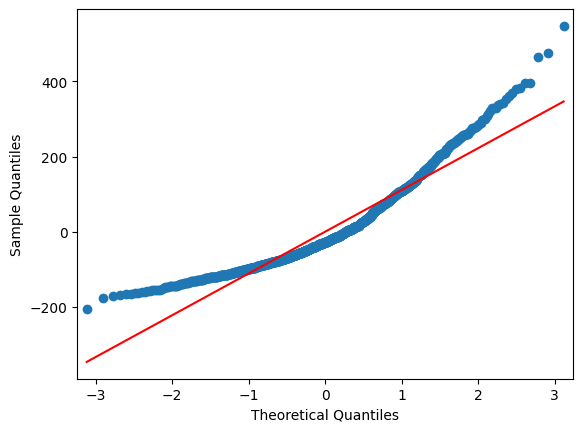

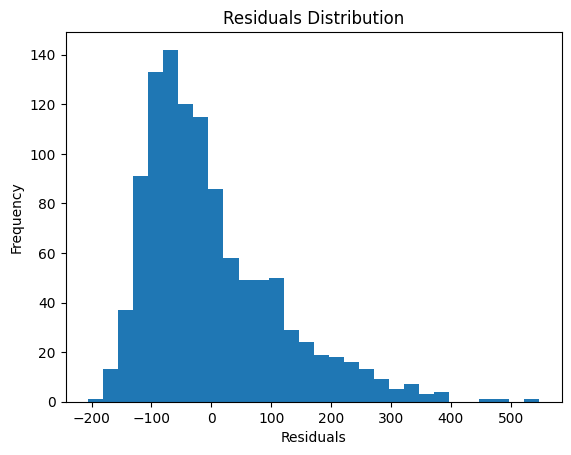

In [27]:
import scipy.stats as stats

# Predict the values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# QQ plot
sm.qqplot(residuals, line='s')
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

#Transforming y and generating a new linear regression model. It explains about 46% of the variance in Boxes Shipped, which is a big improvement from the previous one. Despite this, price per box and amount remain the only factors contributing to boxes shipped.

In [28]:
import statsmodels.api as sm

X = df.drop(columns=['Boxes Shipped'])

#Improving my model by transforming y (dependent variable) to remove extreme outliers.
y = np.log(df['Boxes Shipped'])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Boxes Shipped   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     16.72
Date:                Thu, 01 May 2025   Prob (F-statistic):          8.17e-105
Time:                        03:58:08   Log-Likelihood:                -1212.1
No. Observations:                1094   AIC:                             2532.
Df Residuals:                    1040   BIC:                             2802.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.9573      0.163     30.404      0.000       4.637       5.277
Amount                               0.1279      0.024      5.356      0.000       0.081       0.175
Price per box                       -0.0024   8.56e-05    -28.320      0.000      -0.003      -0.002
Month                               -0.0075      0.010     -0.745      0.457      -0.027       0.012
Sales Person_Barr Faughny            0.0553      0.167      0.331      0.741      -0.273       0.383
Sales Person_Beverie Moffet          0.1109      0.162      0.686      0.493      -0.207       0.428
Sales Person_Brien Boise            -0.1106      0.160     -0.693      0.489      -0.424       0.203
Sales Person_Camilla Castle         -0.0310      0.181     -0.171      0.864      -0.386       0.324
Sales Person_Ches Bonnell            0.0047      0.164      0.029      0.977      -0.316       0.326
Sales Person_Curtice Advani         -0.0377      0.164     -0.230      0.818      -0.360       0.284
Sales Person_Dennison Crosswaite     0.0055      0.163      0.034      0.973      -0.314       0.325
Sales Person_Dotty Strutley          0.2586      0.175      1.474      0.141      -0.086       0.603
Sales Person_Gigi Bohling           -0.0478      0.164     -0.292      0.771      -0.369       0.274
Sales Person_Gunar Cockshoot        -0.0405      0.168     -0.242      0.809      -0.369       0.288
Sales Person_Husein Augar           -0.0975      0.173     -0.565      0.572      -0.436       0.241
Sales Person_Jan Morforth            0.1396      0.171      0.815      0.416      -0.197       0.476
Sales Person_Jehu Rudeforth          0.0090      0.167      0.054      0.957      -0.320       0.338
Sales Person_Kaine Padly            -0.0422      0.165     -0.255      0.799      -0.367       0.282
Sales Person_Karlen McCaffrey        0.2191      0.164      1.339      0.181      -0.102       0.540
Sales Person_Kelci Walkden          -0.0386      0.159     -0.242      0.808      -0.351       0.274
Sales Person_Madelene Upcott         0.0093      0.167      0.056      0.955      -0.317       0.336
Sales Person_Mallorie Waber         -0.0455      0.169     -0.269      0.788      -0.378       0.286
Sales Person_Marney O'Breen          0.1749      0.165      1.058      0.290      -0.150       0.499
Sales Person_Oby Sorrel              0.0795      0.163      0.488      0.625      -0.240       0.399
Sales Person_Rafaelita Blaksland    -0.1299      0.178     -0.731      0.465      -0.479       0.219
Sales Person_Roddy Speechley         0.0089      0.167      0.053      0.958      -0.319       0.336
Sales Person_Van Tuxwell            -0.1623      0.161     -1.010      0.313      -0.478       0.153
Sales Person_Wilone O'Kielt         -0.2141      0.17